In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from iteration_utilities import deepflatten
from sklearn.datasets import make_blobs

In [21]:
# This algorithm is too reliant on luck as it randomly selects the initial points and assigns reliantly to that point.
# This algo doesnt check if the new point is in total area covered by all the circles.
# Never use this method :P 
def dbscan(df, eps=5):
    
    labels = {}

    data = [i.tolist() for i in df]

    it = 0
    while 1:

        if it == 0:
            point = data[0]
        else:
            point = data_ex[0]
        
        labels[it] = [point]

        flag = 0
        while flag == 0:
            
            data_ex = [row.tolist() for row in df if row.tolist() not in list(deepflatten(list(labels.values()), depth=1))]
            if len(data_ex) == 0:
                n = []
                for k in df.tolist():    
                    for key in labels:
                        for item in labels[key]:
                            if k == item:
                                n.append(key)
                return n
            distances = cdist(data_ex, [point])
            arg_min = np.argmin(distances)
            if distances[arg_min] > eps:
                break
            labels[it].append(data_ex[arg_min])
            point = data_ex[arg_min]
        it += 1

In [15]:
df = make_blobs()[0]

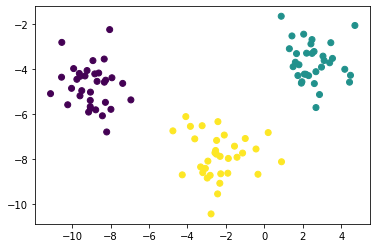

In [22]:
import matplotlib.pyplot as plt

plt.scatter(df[:,0],df[:,1],c=dbscan(df))